In [1]:
from ROOT import TFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.08/06


In [4]:
dataFile=TFile.Open("degALL_data_2017_BA_treeFlat_DSelector.root")

In [7]:
N=dataFile.degALL_data_2017_BA_tree_flat.GetEntries()
s12s = np.zeros(N)
u3s = np.zeros(N)
s23s_pi0p = np.zeros(N)
s23s_etap = np.zeros(N)
t1s_eta = np.zeros(N)
t1s_pi0 = np.zeros(N)
for ievent,event in enumerate(dataFile.degALL_data_2017_BA_tree_flat):
    if ievent < N:
        s12s[ievent] = event.Mpi0eta
        s23s_pi0p[ievent] = event.Mpi0p
        s23s_etap[ievent] = event.Metap
        u3s[ievent] = event.mandelstam_tp
        t1s_eta[ievent] = event.mandelstam_teta
        t1s_pi0[ievent] = event.mandelstam_tpi0
    else:
        break

In [8]:
dataDict = {"s12s":s12s,
            "u3s":u3s,
            "s23s_pi0p":s23s_pi0p,
            "s23s_etap":s23s_etap,
            "t1s_eta":t1s_eta,
            "t1s_pi0":t1s_pi0
           }
titles = ["s12_M(pi0eta)",
          "u3_t",
          "s23_M(pi0p)",
          "s23_M(etap)",
          "t1_teta",
          "t1_tpi0"
         ]

In [9]:
class plotClass:
    nPlots=0
    binedges=[]
    def makePlots(self, args):
        data, titles, label = args
        for icol, col in enumerate(data.columns):
            if(plotClass.nPlots==0):
                plotClass.binedges.append(np.histogram(data[col],bins=75)[1])
            axes[icol].set_title(titles[icol])
            data[col].plot(kind="hist",bins=plotClass.binedges[icol],ax=axes[icol],label=label,alpha=0.6) 
        plotClass.nPlots += 1 

In [10]:
data=pd.DataFrame(dataDict,columns=["s12s","u3s","s23s_pi0p","s23s_etap","t1s_eta","t1s_pi0"])

Final number of events: 14143


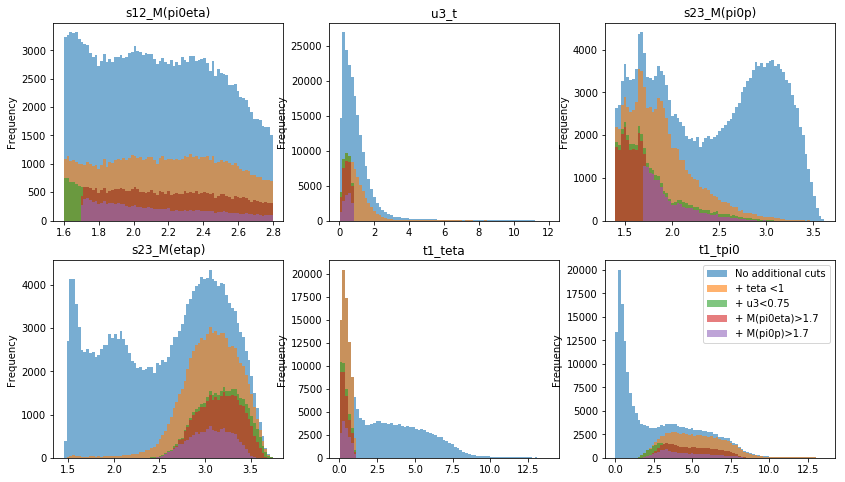

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(14,8))
axes = axes.flatten()
plots=plotClass()

dataCopy=data
plots.makePlots([dataCopy,titles,"No additional cuts"])

dataCopy=dataCopy[dataCopy.t1s_eta<1]
plots.makePlots([dataCopy,titles, "+ teta <1"])

dataCopy=dataCopy[dataCopy.u3s<0.75]
plots.makePlots([dataCopy,titles, "+ u3<0.75"])

dataCopy=dataCopy[dataCopy.s12s>1.7]
plots.makePlots([dataCopy,titles, "+ M(pi0eta)>1.7"])

dataCopy=dataCopy[dataCopy.s23s_pi0p>1.7]
plots.makePlots([dataCopy,titles, "+ M(pi0p)>1.7"])

print("Final number of events: {0}".format(len(dataCopy)))
plt.legend()
plt.savefig("asymmetryPlots/tightSelections_fastEta.png")

Blue curve has a bunch of standard cuts, labeled as "no additional cuts" in the legend. Each labeled histogram includes one EXTRA cut added on top to the previous. Selecting teta<1 removes one of the humps in the baryon mass plots as expected. Selecting on u3, proton transfer momentum, removes one peak in M(pi0p). Selecting on M(pi0p) removces the two peaks. With these selections there are about 5000 events above 1.9 GeV in M(pi0eta). This is all the 2017 data. Maybe with these selections I can get the asymmetry vs teta when using the 2018 data also.

In [12]:
del plots

Final number of events: 9333


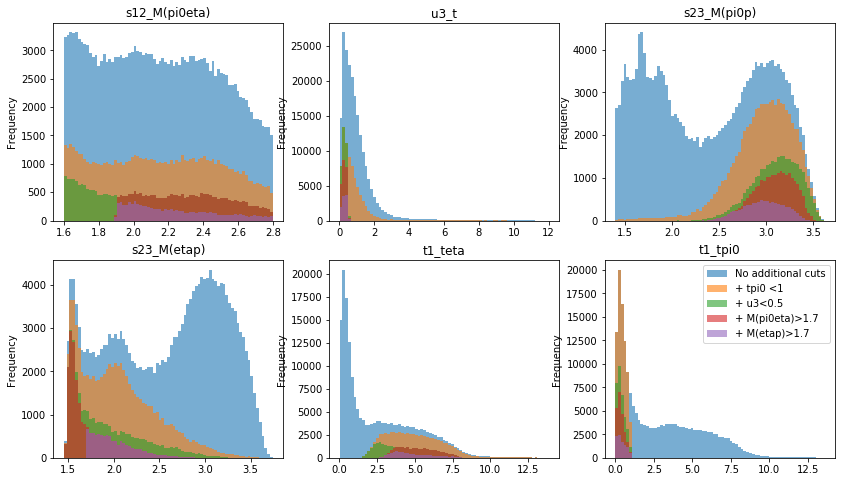

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(14,8))
axes = axes.flatten()
plots=plotClass()

dataCopy=data
plots.makePlots([dataCopy,titles,"No additional cuts"])

dataCopy=dataCopy[dataCopy.t1s_pi0<1]
plots.makePlots([dataCopy,titles, "+ tpi0 <1"])

dataCopy=dataCopy[dataCopy.u3s<0.5]
plots.makePlots([dataCopy,titles, "+ u3<0.5"])

dataCopy=dataCopy[dataCopy.s12s>1.9]
plots.makePlots([dataCopy,titles, "+ M(pi0eta)>1.7"])

dataCopy=dataCopy[dataCopy.s23s_etap>1.7]
plots.makePlots([dataCopy,titles, "+ M(etap)>1.7"])

print("Final number of events: {0}".format(len(dataCopy)))
plt.legend()
plt.savefig("asymmetryPlots/tightSelections_fastPi0.png")